<a href="https://colab.research.google.com/github/gyoganand/ai/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np


In [16]:
tf.__version__

'2.2.0-rc2'

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

Label: 2


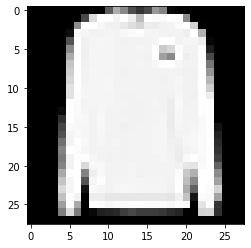

In [18]:
%matplotlib inline
import random
import matplotlib.pyplot as plt

i = random.randint(0, 100)
print("Label: %s" % train_labels[i])
plt.imshow(train_images[i], cmap='gray')

In [0]:
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)
train_images = np.reshape(train_images, (TRAINING_SIZE, 784))
test_images = np.reshape(test_images, (TEST_SIZE, 784))
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)
train_images /= 255
test_images /=  255


In [0]:
NUM_CAT = 10


train_labels  = tf.keras.utils.to_categorical(train_labels, NUM_CAT)

test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CAT)


In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(784,)))
model.add(tf.keras.layers.Dense(NUM_CAT, activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6784 - accuracy: 0.7666
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4665 - accuracy: 0.8385
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4352 - accuracy: 0.8493
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4198 - accuracy: 0.8547
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4099 - accuracy: 0.8581


In [26]:
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy: %.2f' % (accuracy))


313/313 [==============================] - 0s 1ms/step - loss: 0.4551 - accuracy: 0.8431
Test accuracy: 0.84
